Assignment 4 - Time series prediction using RNN – stock market analysis or weather forecasting

In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import seaborn as sns

In [24]:
# 1. Load Stock Data
df = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
prices = df['Close'].values.reshape(-1, 1)

/tmp/ipython-input-3533544328.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


In [25]:
# 2. Normalize
scaler = MinMaxScaler()
scaled = scaler.fit_transform(prices)

In [26]:
# 3. Prepare Sequences (past 60 days -> next day)
X, y = [], []
time_steps = 60
for i in range(time_steps, len(scaled)):
    X.append(scaled[i-time_steps:i, 0])
    y.append(scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [27]:
# 4. Build RNN Model
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(time_steps, 1)),
    SimpleRNN(50),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# 5. Train
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1460
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0016
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.0803e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.8272e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.8106e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.9283e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0296e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.1958e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.1778e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.7440e-04


In [29]:
# 6. Predict
pred = model.predict(X)
pred = scaler.inverse_transform(pred)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [15]:
# 6. Predict & Inverse Transform
pred = model.predict(X)
pred_prices = scaler.inverse_transform(pred)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


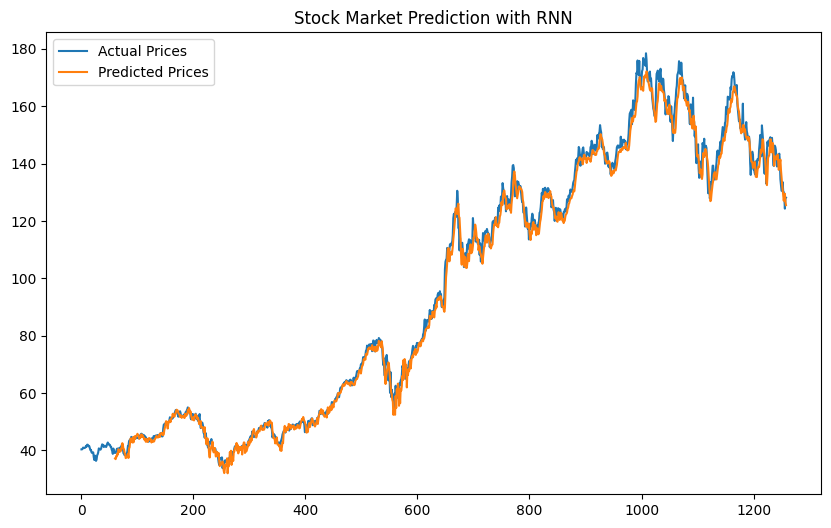

In [30]:
# 7. Plot Results
plt.figure(figsize=(10,6))
plt.plot(prices, label="Actual Prices")
plt.plot(np.arange(time_steps, len(pred)+time_steps), pred, label="Predicted Prices")
plt.legend()
plt.title("Stock Market Prediction with RNN")
plt.show()

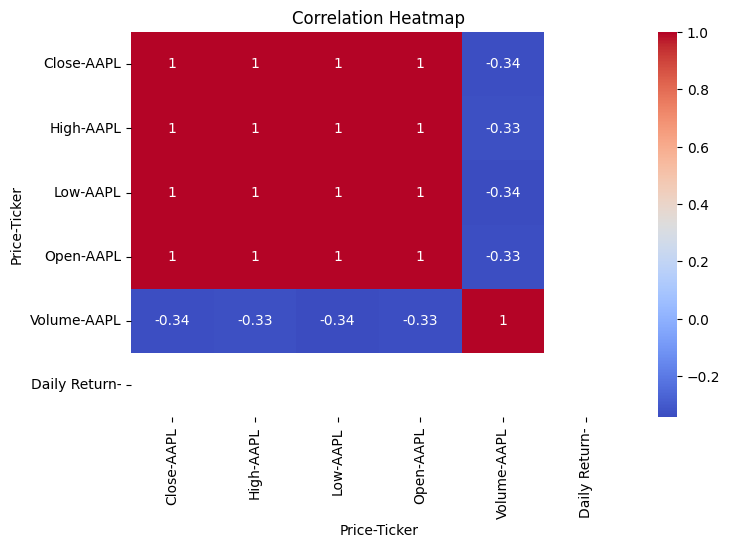

In [35]:
# 9. Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

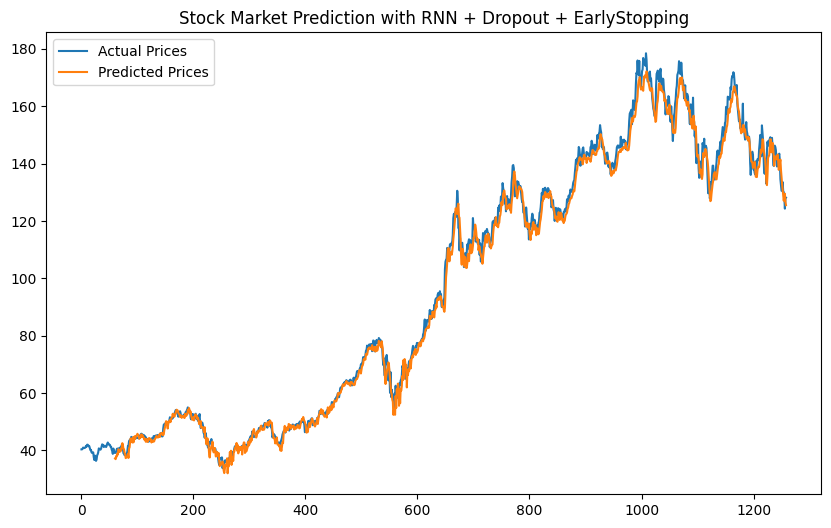

In [31]:
# 8. Plot
plt.figure(figsize=(10,6))
plt.plot(prices, label="Actual Prices")
plt.plot(np.arange(time_steps, len(pred)+time_steps), pred, label="Predicted Prices")
plt.legend()
plt.title("Stock Market Prediction with RNN + Dropout + EarlyStopping")
plt.show()